<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/combined(w2v).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
url0='https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataISEAR.csv'
# url1 = 'https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataisear(preputama).csv'
# url2 = 'tba'
df = pd.read_csv(url0)
# df.iloc[:,1]

In [ ]:
df.emosi.value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: emosi, dtype: int64

In [ ]:
df.head()

,emosi,dokumen
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


preputama : lower case

In [ ]:
df['dokumen']=df['dokumen'].str.lower()
# print(df.iloc[4,1])

preputama : Pembersihan noise (over enter and space)

In [ ]:
df=df.replace(' \n', ' ', regex=True)
df=df.replace('   ', ' ', regex=True)
df=df.replace('  ', ' ', regex=True)

preptambah : expand contractions

In [ ]:
!pip install contractions
import contractions

In [ ]:
df[df['dokumen'].str.contains("couldn't")]

,emosi,dokumen
124,disgust,"when i saw a picture, in the gothenburg post, ..."
526,anger,a friend suggested in a round-about way that t...
545,fear,"i was rock-climbing and absailing & felt ok, b..."
553,anger,"getting a terrible exam mark, which i couldn't..."
673,fear,"after seeing a terror movie at the cinema, i w..."
...,...,...
6589,joy,when my boyfriend came form rumphi to lilongwe...
6592,sadness,i wrote a letter to my boyfriend but he couldn...
6595,guilt,one day i found an incontinent man in the ward...
6624,joy,it was in 1983 september when mce results were...


In [ ]:
expanded_words = []    

In [ ]:
for word in df.dokumen:
  expanded_words.append(contractions.fix(word))

In [ ]:
np.shape(expanded_words)

(7516,)

In [ ]:
df.dokumen=expanded_words

In [ ]:
df[df['dokumen'].str.contains("couldn't")]

,emosi,dokumen


In [ ]:
df.dokumen[124]

'when i saw a picture, in the gothenburg post, of a totally demolished car with two fatally injured passengers. the car was so badly damaged that they could not get the bodies out at the scene of the accident.'

preputama : cleansing

In [ ]:
df['dokumen'] = df['dokumen'].str.replace(r'[^\w\s]+', '')

In [ ]:
df.shape

(7516, 2)

preptambah : remove stopword

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pat = r'\b(?:{})\b'.format('|'.join(stop))
df['dokumen'] = df['dokumen'].str.replace(pat, '')
df['dokumen'] = df['dokumen'].str.replace(r'\s+', ' ')

In [ ]:
df.head()

,emosi,dokumen
0,joy,days feel close partner friends feel peace al...
1,fear,every time imagine someone love could contact ...
2,anger,obviously unjustly treated possibility elucid...
3,sadness,think short time live relate periods life thi...
4,disgust,gathering found involuntarily sitting next tw...


In [ ]:
df.dokumen

0        days feel close partner friends feel peace al...
1       every time imagine someone love could contact ...
2        obviously unjustly treated possibility elucid...
3        think short time live relate periods life thi...
4        gathering found involuntarily sitting next tw...
                              ...                        
7511    two years back someone invited tutor granddaug...
7512     taken responsibility something prepared howev...
7513     home heard loud sound spitting outside door t...
7514        homework teacher asked us scolded immediately
7515     shouted younger brother always afraid called ...
Name: dokumen, Length: 7516, dtype: object

In [ ]:
df.shape

(7516, 2)

preputama : Lemmatization(d laporan salah tkoniize word)

In [ ]:
sentences = [word_tokenize(x) for x in df.dokumen] 
# df = pd.DataFrame(df.apply(list,axis=1), columns=['dokumen'])

In [ ]:
df.dokumen=sentences

preptambah : steming (di laporan lematization salah karna lematization = tokenize)

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [ ]:
# temp = df.dokumen.apply(lambda x: [stemmer.stem(y) for y in x])
df['dokumen'].apply(lambda x: [stemmer.stem(y) for y in x])

0       [day, feel, close, partner, friend, feel, peac...
1       [everi, time, imagin, someon, love, could, con...
2               [obvious, unjust, treat, possibl, elucid]
3       [think, short, time, live, relat, period, life...
4       [gather, found, involuntarili, sit, next, two,...
                              ...                        
7511    [two, year, back, someon, invit, tutor, grandd...
7512    [taken, respons, someth, prepar, howev, fail, ...
7513    [home, heard, loud, sound, spit, outsid, door,...
7514          [homework, teacher, ask, us, scold, immedi]
7515    [shout, younger, brother, alway, afraid, call,...
Name: dokumen, Length: 7516, dtype: object

In [ ]:
df.head()

,emosi,dokumen
0,joy,"[days, feel, close, partner, friends, feel, pe..."
1,fear,"[every, time, imagine, someone, love, could, c..."
2,anger,"[obviously, unjustly, treated, possibility, el..."
3,sadness,"[think, short, time, live, relate, periods, li..."
4,disgust,"[gathering, found, involuntarily, sitting, nex..."


save df

In [ ]:
# df.to_csv(r'dataisear(preptambah).csv', index = False)

word2ec

In [ ]:
from gensim.models import Word2Vec

In [ ]:
len(df)

7516

In [ ]:
w2v = Word2Vec(df.dokumen, window=2, min_count=1, workers=4, sg=1)

cek model

In [ ]:
cek=w2v.wv
words=w2v.wv.vocab
# words
cek.vector_size

100

In [ ]:
cek.vectors.shape

(9192, 100)

In [ ]:
len(cek.vocab)

9192

In [ ]:
cek["moment"]

array([ 0.2185463 ,  0.08702391, -0.32727066, -0.06436167,  0.22615302,
        0.22651462,  0.18474051,  0.03915143, -0.22768112, -0.23117043,
       -0.10700829,  0.08683989,  0.19159932, -0.11243478,  0.23665747,
       -0.18484898, -0.24637419, -0.02854672, -0.03768817, -0.04526505,
       -0.13761431, -0.04501697,  0.13241933,  0.07273952,  0.27980986,
        0.08737787, -0.24069013, -0.1126037 , -0.14711091, -0.27172124,
       -0.03693034, -0.04357366, -0.15674192, -0.27755895,  0.05964946,
       -0.01006231, -0.20303223,  0.10884158, -0.08640064, -0.25804287,
        0.14290988,  0.1331313 ,  0.04520582,  0.10686604,  0.01814126,
        0.11765194,  0.10557097, -0.27132964,  0.01287208,  0.27540565,
       -0.10235897, -0.17088525,  0.04002877, -0.18985282, -0.04601238,
       -0.3149697 , -0.09482209,  0.22038761, -0.01601599,  0.13224219,
        0.16437913, -0.06793112, -0.43317404,  0.03969757, -0.1981414 ,
        0.33241677,  0.34497702,  0.21775927,  0.18620504, -0.19

ekstraksi fitur

In [ ]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
for senten in df.dokumen:
  for word in senten:
    temp=np.add(temp,cek[word])
  temp=temp/len(senten)
  ekstrak.append(temp)
has_vec=ekstrak

In [ ]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(7516, 100)
(7516,)


klasifikasi svm

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')# clf.kernel
scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

0.22072661982604752

In [ ]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr')# clf.kernel
scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

0.20183638127886222

In [ ]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr')# clf.kernel
scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

0.19385411649715273

In [ ]:
clf = svm.SVC(kernel='sigmoid', decision_function_shape='ovr')# clf.kernel
scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

0.12387207128084539

conf matrix cara 1

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr')

In [ ]:
y_pred = cross_val_predict(clf, X, y, cv=10)

In [ ]:
conf_mat = confusion_matrix(y, y_pred,labels=["anger","disgust","fear","guilt","joy","sadness","shame"])
conf_mat

array([[196,  56, 683,  47,  60,  47,   3],
       [112, 175, 621,  49,  53,  68,   4],
       [ 51,  37, 837,  30,  83,  40,   1],
       [ 71,  29, 790,  74,  77,  34,   1],
       [ 55,  43, 827,  12,  76,  47,   6],
       [ 79,  32, 774,  19,  67,  93,   7],
       [ 60,  40, 750,  20,  75,  92,  13]])

In [ ]:
accuracy_score(y, y_pred)

0.19478445981905268

conf matrix cara 2

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

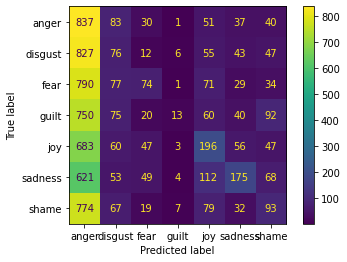

In [ ]:
ConfusionMatrixDisplay.from_predictions(y, y_pred)
# ConfusionMatrixDisplay(conf_mat,display_labels=["joy","sadness","anger","fear","disgust","shame","guilt"])
plt.show()